In [1]:
#processing netcdf4 data 

In [2]:
#essential libraries dear
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr
import rioxarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et

sns.set(font_scale=1.3)
sns.set_style("white")

#os.chdir(os.path.join(et,io.HOME,'earth-analytics','data')


In [3]:
data_path = "http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_tasmax_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_monthly.nc"
max_temp_xr = xr.open_dataset(data_path)
max_temp_xr

<xarray.Dataset> Size: 2GB
Dimensions:          (lat: 585, crs: 1, lon: 1386, time: 672)
Coordinates:
  * lat              (lat) float64 5kB 25.06 25.1 25.15 ... 49.31 49.35 49.4
  * crs              (crs) int32 4B 1
  * lon              (lon) float64 11kB 235.2 235.3 235.3 ... 292.9 292.9 292.9
  * time             (time) object 5kB 1950-01-15 00:00:00 ... 2005-12-15 00:...
Data variables:
    air_temperature  (time, lat, lon) float32 2GB ...
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326

In [4]:
#view the first 5-values
max_temp_xr["air_temperature"]["lat"].values[:5]

array([25.06307793, 25.10474396, 25.14640999, 25.18807602, 25.22974205])

In [5]:
#setting ccrs
climate_crs = max_temp_xr.rio.crs
climate_crs

CRS.from_wkt('GEOGCS["undefined",DATUM["undefined",SPHEROID["undefined",6378137,298.257223563]],PRIMEM["undefined",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

In [6]:
# latitude  range of datata
print("the min lat was  {} ,the maxi lat was {}".format(max_temp_xr["air_temperature"]["lat"].values.min(),max_temp_xr["air_temperature"]["lat"].values.max()))

the min lat was  25.063077926635742 ,the maxi lat was 49.39602279663086


In [7]:
# longitude range of datata
print("the min lon was  {} ,the maxi lon was {}".format(max_temp_xr["air_temperature"]["lon"].values.min(),max_temp_xr["air_temperature"]["lon"].values.max()))

the min lon was  235.22784423828125 ,the maxi lon was 292.93524169921875


In [8]:
#Viewing time range
print("the time range was between {} - {}".format(max_temp_xr["air_temperature"]["time"].values.min(),max_temp_xr["air_temperature"]["time"].values.max()))
                                                 

the time range was between 1950-01-15 00:00:00 - 2005-12-15 00:00:00


In [9]:
#data shape
print("data shape is {}".format(max_temp_xr["air_temperature"]["time"].shape))

data shape is (672,)


In [10]:
#-reviewing metadata
metadata= max_temp_xr.attrs
metadata

{'description': 'Multivariate Adaptive Constructed Analogs (MACA) method, version 2.3,Dec 2013.',
 'id': 'MACAv2-METDATA',
 'naming_authority': 'edu.uidaho.reacch',
 'Metadata_Conventions': 'Unidata Dataset Discovery v1.0',
 'Metadata_Link': '',
 'cdm_data_type': 'FLOAT',
 'title': 'Monthly aggregation of downscaled daily meteorological data of Monthly Average of Daily Maximum Near-Surface Air Temperature from College of Global Change and Earth System Science, Beijing Normal University (BNU-ESM) using the run r1i1p1 of the historical scenario.',
 'summary': 'This archive contains monthly downscaled meteorological and hydrological projections for the Conterminous United States at 1/24-deg resolution. These monthly values are obtained by aggregating the daily values obtained from the downscaling using the Multivariate Adaptive Constructed Analogs (MACA, Abatzoglou, 2012) statistical downscaling method with the METDATA (Abatzoglou,2013) training dataset. The downscaled meteorological vari

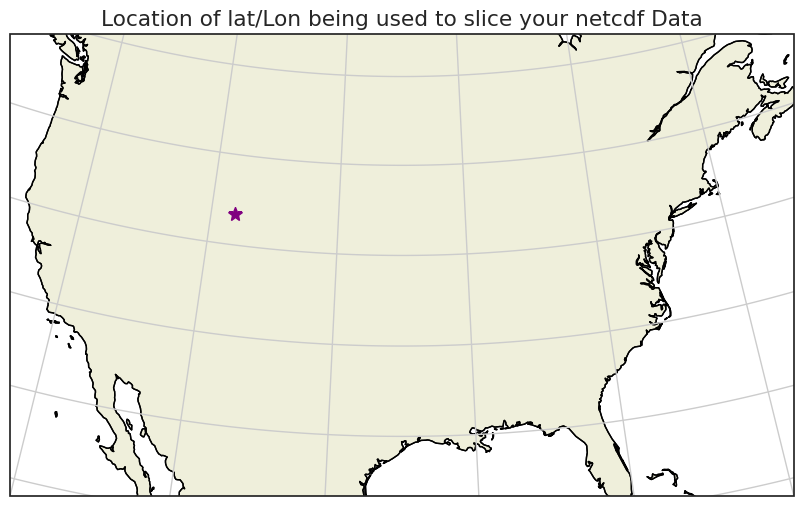

In [11]:
#creating spatial map of the selected cartopy
key = 400
latitude = max_temp_xr["air_temperature"]["lat"][key]
longitude = max_temp_xr["air_temperature"]["lon"][key]
extent = [-120,-70,24,50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#creating a figure and an axis object
f,ax = plt.subplots(figsize=(12,6),subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon,central_lat)})
ax.coastlines()

ax.plot(longitude-360,latitude,marker='*',transform=ccrs.PlateCarree(),color="purple",markersize=10)

ax.set_extent(extent)
ax.set(title="Location of lat/Lon being used to slice your netcdf Data")
ax.add_feature(cfeature.LAND,edgecolor='black')
ax.gridlines()
plt.show()


In [12]:
#subsetting the data
one_point = max_temp_xr["air_temperature"].sel(lat=latitude,lon=longitude)
one_point
#this data is in numpy array

<xarray.DataArray 'air_temperature' (time: 672)> Size: 3kB
[672 values with dtype=float32]
Coordinates:
    lat      float64 8B 41.73
    lon      float64 8B 251.9
  * time     (time) object 5kB 1950-01-15 00:00:00 ... 2005-12-15 00:00:00
Attributes:
    long_name:      Monthly Average of Daily Maximum Near-Surface Air Tempera...
    units:          K
    grid_mapping:   crs
    standard_name:  air_temperature
    height:         2 m
    cell_methods:   time: maximum(interval: 24 hours);mean over days
    _ChunkSizes:    [ 10  44 107]

In [14]:
#plotting the data
one_point.plot.line(hue='lat',marker='.',ax=ax,color = "grey",markerfacecolor="purple",markeredgecolor="purple")
ax.set(title="Time Series for a single locations")
plt.show()